# Bryan Camilo Hurtado Suarez - cel:3228412057

# DIMENSIONES DE LOS DATOS EVALUACIÓN DE LA CALIDAD

Para asegurar la calidad de los datos se deben tener en cuenta las siguientes características[1]:

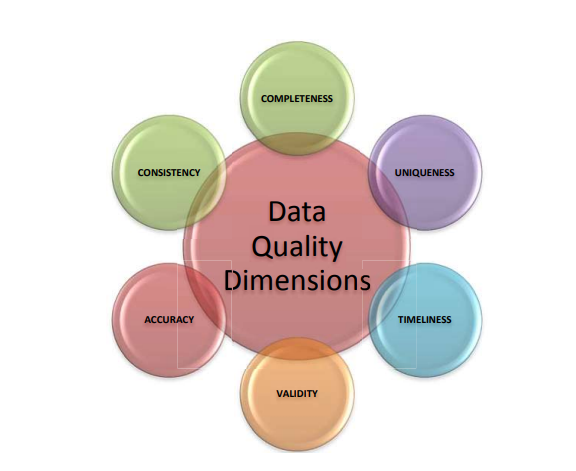

Luego, acá se tiene una breve descripción de cada una[1]:

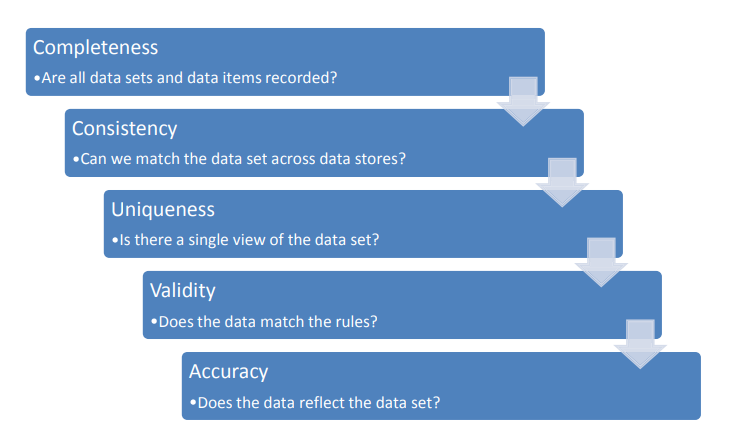

Dado que en este caso solo estamos trabajando con un dataset y no con las bases de datos de una compañía, solo se realizara la parte de validación que radica en detectar anomalias y asegurar que los datos cumplan con las reglas establecidas. Luego, al ser la data obtenida de una compañía confiable como spotify, se confía en que el dataset refleja la realidad.

# Detección de anomalías

El objetivo es familiarizarse con los datos, la forma en que están estructurados y lo que representa cada columna. De igual importancia, revisar la consistencia de los datos que es fundamental para el análisis.

En primer lugar, se cargan las librerías necesarias:

In [1]:
import pandas as pd

Luego, se carga el datset:

In [2]:
df = pd.read_csv('/content/dataset.csv')

## Exploracion inicial

Una primer mirada al dataset, con el fin de familiarizarse con este:

In [3]:
df.head()

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22


In [4]:
df.tail()

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,0.668,0.672,2.0,...,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
536,1,203226,False,13,58,1k3PzDNjg38cWqOvL4M9vq,Invisible,0.612,0.394,7.0,...,96.001,1k3PzDNjg38cWqOvL4M9vq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
537,1,220146,False,14,58,0YgHuReCSPwTXYny7isLja,A Perfectly Good Heart,0.483,0.751,4.0,...,156.092,0YgHuReCSPwTXYny7isLja,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
538,1,179066,False,15,58,1hxLyjC9D9Jpw6EAPKqWv4,Teardrops on My Guitar - Pop Version,0.459,0.753,10.0,...,199.997,1hxLyjC9D9Jpw6EAPKqWv4,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen


Es importante conocer el número de filas y columnas:

In [5]:
df.shape

(539, 27)

Columnas presentes:

In [6]:
df.columns

Index(['disc_number', 'duration_ms', 'explicit', 'track_number',
       'track_popularity', 'track_id', 'track_name',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.key', 'audio_features.loudness', 'audio_features.mode',
       'audio_features.speechiness', 'audio_features.acousticness',
       'audio_features.instrumentalness', 'audio_features.liveness',
       'audio_features.valence', 'audio_features.tempo', 'audio_features.id',
       'audio_features.time_signature', 'artist_id', 'artist_name',
       'artist_popularity', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks'],
      dtype='object')

Estadísticas básicas:

In [7]:
df.describe()

,disc_number,duration_ms,track_number,track_popularity,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature,artist_popularity
count,539.000000,539.000000,539.000000,539.000000,537.000000,537.000000,538.000000,537.000000,539.000000,538.000000,538.000000,538.000000,539.000000,538.000000,538.000000,539.0
mean,1.031540,236003.725417,11.280148,62.918367,0.587242,0.573065,4.587361,-7.520639,0.912801,0.057709,0.337806,0.163308,0.398410,122.362639,3.986989,120.0
std,0.174934,55019.871010,7.965621,22.498757,0.116858,0.192309,3.246082,2.933158,0.282388,0.073146,0.395292,0.141800,0.199409,30.485522,0.197323,0.0
min,1.000000,-223093.000000,1.000000,-92.000000,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540,0.033500,0.037400,68.097000,3.000000,120.0
25%,1.000000,209486.500000,5.000000,51.000000,0.517000,0.436000,2.000000,-9.287000,1.000000,0.030525,0.036250,0.096500,0.230000,96.684500,4.000000,120.0
50%,1.000000,233626.000000,10.000000,69.000000,0.595000,0.589000,5.000000,-6.942000,1.000000,0.037750,0.167500,0.115000,0.386000,119.000500,4.000000,120.0
75%,1.000000,259045.500000,15.000000,77.000000,0.661000,0.729000,7.000000,-5.376000,1.000000,0.056400,0.663750,0.162250,0.535000,143.939000,4.000000,120.0
max,2.000000,613026.000000,46.000000,152.000000,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000,0.931000,0.943000,208.918000,5.000000,120.0


Empezamos a observar algunos problemas como lo puede ser algunas columnas con valores negativos que no deberían estar presentes. Esto se analizará detenidamente en siguientes instancias.

## Verificar el tipo de data en cada columna

En primer lugar, se quiere conocer el tipo de cada columna, aspecto que es fundamental para en el futuro hacer un correcto análisis del dataset:

In [8]:
df.dtypes

disc_number                          int64
duration_ms                          int64
explicit                            object
track_number                         int64
track_popularity                     int64
track_id                            object
track_name                          object
audio_features.danceability        float64
audio_features.energy              float64
audio_features.key                 float64
audio_features.loudness            float64
audio_features.mode                  int64
audio_features.speechiness         float64
audio_features.acousticness        float64
audio_features.instrumentalness     object
audio_features.liveness            float64
audio_features.valence             float64
audio_features.tempo               float64
audio_features.id                   object
audio_features.time_signature      float64
artist_id                           object
artist_name                         object
artist_popularity                    int64
album_id   

Se observa que algunas columnas tienen un formato que no es el deseado, estas son las recomendaciones:



*   La columna 'explicit' transformar a 'bool'
*   La columna 'audio_features.instrumentalness' transformar a 'float64'
*   La columna 'audio_features.mode' transformar a 'bool', también se puede dejar como 'int64'
*   La columna 'album_release_date' transformar a 'datetime'
*   La columna 'album_total_tracks' transformar a 'int64'
*   La columna 'audio_features.key' transformar a 'int64'
*   La columna 'audio_features.time_signature' transformar a 'int64'




## verificar datos perdidos

Es importante ver datos nulos dentro del dataset, ya que de ser el caso se requerirá manejarlo: sea borrando las filas, reunir los datos faltantes o rellenarlos usando alguna técnica dependiendo el caso:

In [9]:
df.isnull().sum()

disc_number                         0
duration_ms                         0
explicit                            0
track_number                        0
track_popularity                    0
track_id                            8
track_name                          7
audio_features.danceability         2
audio_features.energy               2
audio_features.key                  1
audio_features.loudness             2
audio_features.mode                 0
audio_features.speechiness          1
audio_features.acousticness         1
audio_features.instrumentalness     0
audio_features.liveness             1
audio_features.valence              0
audio_features.tempo                1
audio_features.id                   0
audio_features.time_signature       1
artist_id                           0
artist_name                         0
artist_popularity                   0
album_id                            0
album_name                         62
album_release_date                  0
album_total_

Se evidencia que varias columnas existen datos faltantes, como se ha dicho anteriormente, se requerirá tratar esto antes de pasar a análisis.

Filas que no tienen nombre en el álbum:

In [10]:
df[df['album_name'].isna()]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
329,1,329160,False,1,42,00vJzaoxM3Eja1doBUhX0P,All Too Well,0.602,0.605,0.0,...,93.061,00vJzaoxM3Eja1doBUhX0P,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
330,1,220440,False,2,45,22C0JIVhFaczZ4t9heqREN,Wildest Dreams,NaN,NaN,8.0,...,139.997,22C0JIVhFaczZ4t9heqREN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
331,1,246306,False,3,36,7APTsjmZbj7TFXQJAiRti4,The Best Day,0.669,0.448,1.0,...,126.068,7APTsjmZbj7TFXQJAiRti4,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
332,1,223093,False,4,39,4V9NuhKQcUFt4cgbynHV79,Red,0.605,0.899,1.0,...,124.985,4V9NuhKQcUFt4cgbynHV79,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
333,1,202960,False,5,36,4hCZk6WJBFQeG3P7WsyntI,Holy Ground,0.627,0.816,4.0,...,157.043,4hCZk6WJBFQeG3P7WsyntI,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,83253,False,12,50,4KB3zBArZ1rHRExilzycaV,I Want You Back - Live/2011,0.536,0.512,6.0,...,97.397,4KB3zBArZ1rHRExilzycaV,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
441,1,404680,False,13,48,4DbI1rr4IQ2bc8nejy9ttd,Dear John - Live/2011,0.521,0.386,4.0,...,119.518,4DbI1rr4IQ2bc8nejy9ttd,3.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
442,1,389213,False,14,49,NaN,Enchanted - Live/2011,0.340,0.663,8.0,...,163.678,3lm4L3pPL32PFy74dR17OR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
443,1,292426,False,15,48,6znB7YZhMJT2B83zfbiyLq,Haunted - Live/2011,0.338,0.818,5.0,...,162.157,6znB7YZhMJT2B83zfbiyLq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16


In [11]:
missing_album_name= df[df['album_name'].isna()]

Queremos conocer en que álbumes ocurre esto:

In [12]:
missing_album_name['album_id'].value_counts()

1MPAXuTVL2Ej5x0JHiSPq8    46
6fyR4wBPwLHKcRtxgd4sGh    16
Name: album_id, dtype: int64

Se evidencia que ocurre en dos álbumes, ahora con el fin del futuro corregir esto, se quiere encontrar si el nombre correspondiente a estos álbumes está en alguna fila dentro del dataset:

In [13]:
df[df['album_id'] == '1MPAXuTVL2Ej5x0JHiSPq8']['album_name'].value_counts()

Series([], Name: album_name, dtype: int64)

In [14]:
df[df['album_id'] == '6fyR4wBPwLHKcRtxgd4sGh']['album_name'].value_counts()

Series([], Name: album_name, dtype: int64)

En ninguno de los dos casos se cuenta con el nombre, dato que tenemos el id se recomienda ir a la fuente de datos origina para intentar obtener el nombre.

Ahora, se tienen las filas en las que no se tiene el nombre de la canción:

In [15]:
df[df['track_name'].isna()]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
77,1,191039,False,13,68,1QQii3pa5m8MEda0nbkjfw,NaN,0.661,0.345,4.0,...,125.977,1QQii3pa5m8MEda0nbkjfw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
91,1,200690,False,3,71,02Zkkf2zMkwRGQjZ7T4p8f,NaN,0.638,0.634,4.0,...,96.953,02Zkkf2zMkwRGQjZ7T4p8f,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20
104,1,196258,False,16,72,7712gjoih4QoDbXpljEk21,NaN,0.700,0.509,7.0,...,110.947,7712gjoih4QoDbXpljEk21,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20
391,1,216333,False,17,0,4FoV729rw7IhoKlMZW5K5V,NaN,0.592,0.128,9.0,...,78.828,4FoV729rw7IhoKlMZW5K5V,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
396,1,231000,False,3,64,71PmZqBXH0RUETqxpwlV0w,NaN,0.598,0.786,2.0,...,95.021,71PmZqBXH0RUETqxpwlV0w,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5fy0X0JmZRZnVa2UEicIOl,1989,2014-01-01,13
401,1,211933,False,8,79,0TvQLMecTE8utzoNmvXRbK,NaN,0.652,0.802,7.0,...,170.157,0TvQLMecTE8utzoNmvXRbK,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5fy0X0JmZRZnVa2UEicIOl,1989,2014-01-01,13
408,1,-223093,False,2,59,7gJtmLyPTwKzhGzMBXtuXH,NaN,0.602,0.896,1.0,...,124.978,7gJtmLyPTwKzhGzMBXtuXH,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22


Se evidencia que aunque no se tenga el nombre, si se tiene el id. Entonces, se recomienda ir a la fuente original de los datos para intentar obtener el nombre.

Ahora, se tienen las filas cuyas canciones no tienen id:

In [16]:
df[df['track_id'].isna()]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
321,1,209680,False,8,84,NaN,Gorgeous,0.800,0.535,7.0,...,92.027,1ZY1PqizIl78geGM4xWlEA,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6DEjYFkNZh67HP7R9PSZvv,reputation,2017-11-10,15
363,1,238093,False,35,32,NaN,Jump Then Fall,0.617,NaN,2.0,...,80.007,5zytSTR2g0I9psX2Z12ex6,NaN,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
375,1,212600,False,1,60,NaN,Welcome To New York,0.789,0.634,7.0,...,116.992,3nRmDz7qGCvsMS30rGGY0x,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
379,1,193293,False,5,60,NaN,All You Had To Do Was Stay,0.605,0.725,5.0,...,96.970,6aLOekfwbytwWvQftxTEF0,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
382,1,211933,False,8,61,NaN,Bad Blood,0.646,0.794,7.0,...,170.216,2NlmmAjGYrrjAp0MED5rGx,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
434,1,362826,False,6,54,NaN,Back To December/Apologize/You're Not Sorry - ...,0.374,0.516,2.0,...,142.057,1IsquhJFJ0qcFZI7FeAEuN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
442,1,389213,False,14,49,NaN,Enchanted - Live/2011,0.340,0.663,8.0,...,163.678,3lm4L3pPL32PFy74dR17OR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
445,1,230546,False,1,49,NaN,Mine - POP Mix,0.696,0.768,7.0,...,121.050,0GxW5K0qzrq7L1jwSY5OmY,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6Ar2o9KCqcyYF9J0aQP3au,Speak Now,2010-10-25,14


Aunque no tiene el id, si se tiene el nombre, se recomienda usar este para encontrar el id en la fuente de los datos.

Para los valores numéricos perdidos, se recomienda reemplazarlos con la media global dentro del dataset, ya que son pocos y es información valiosa, que será útil en un futuro análisis o aplicación de machine learning

## Verificar duplicados

Luego, es de vital importancia revisar los datos duplicados, si no se trata esto podríamos generar información errónea al momento de generar el análisis:

In [17]:
df.duplicated().sum()

18

Se cuentas con 18 duplicados:

In [18]:
df[df.duplicated()]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
88,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,...,106.026,3xYJScVfxByb61dYHTwiby,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
295,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,...,92.875,43rA71bccXFGD4C8GOpIlN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
297,1,221306,False,3,92,1dGr1c8CrMLDpV6mPbImSI,Lover,0.359,0.543,7.0,...,68.534,1dGr1c8CrMLDpV6mPbImSI,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
298,1,190360,False,4,86,3RauEVgRgj1IuWdJ9fDs70,The Man,0.777,0.658,0.0,...,110.048,3RauEVgRgj1IuWdJ9fDs70,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
299,1,211240,False,5,82,3pHkh7d0lzM2AldUtz2x37,The Archer,0.292,0.574,0.0,...,124.344,3pHkh7d0lzM2AldUtz2x37,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
300,1,173386,False,6,78,2YWtcWi3a83pdEg3Gif4Pd,I Think He Knows,0.897,0.366,0.0,...,100.003,2YWtcWi3a83pdEg3Gif4Pd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
301,1,234146,False,7,83,214nt20w5wOxJnY462klLw,Miss Americana & The Heartbreak Prince,0.662,0.747,11.0,...,150.088,214nt20w5wOxJnY462klLw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
302,1,222400,False,8,86,4y5bvROuBDPr5fuwXbIBZR,Paper Rings,0.811,0.719,9.0,...,103.979,4y5bvROuBDPr5fuwXbIBZR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
303,1,287266,False,9,81,12M5uqx0ZuwkpLp5rJim1a,Cornelia Street,0.824,0.624,0.0,...,102.012,12M5uqx0ZuwkpLp5rJim1a,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
304,1,198533,False,10,79,2dgFqt3w9xIQRjhPtwNk3D,Death By A Thousand Cuts,0.712,0.732,4.0,...,94.071,2dgFqt3w9xIQRjhPtwNk3D,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18


Ahora, se visualizan todos los duplicados (lo que daría un total de 36 filas):

In [19]:
df[df.duplicated(keep=False)]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
85,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,...,106.026,3xYJScVfxByb61dYHTwiby,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
88,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,...,106.026,3xYJScVfxByb61dYHTwiby,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
277,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,...,92.875,43rA71bccXFGD4C8GOpIlN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
279,1,221306,False,3,92,1dGr1c8CrMLDpV6mPbImSI,Lover,0.359,0.543,7.0,...,68.534,1dGr1c8CrMLDpV6mPbImSI,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
280,1,190360,False,4,86,3RauEVgRgj1IuWdJ9fDs70,The Man,0.777,0.658,0.0,...,110.048,3RauEVgRgj1IuWdJ9fDs70,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
281,1,211240,False,5,82,3pHkh7d0lzM2AldUtz2x37,The Archer,0.292,0.574,0.0,...,124.344,3pHkh7d0lzM2AldUtz2x37,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
282,1,173386,False,6,78,2YWtcWi3a83pdEg3Gif4Pd,I Think He Knows,0.897,0.366,0.0,...,100.003,2YWtcWi3a83pdEg3Gif4Pd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
283,1,234146,False,7,83,214nt20w5wOxJnY462klLw,Miss Americana & The Heartbreak Prince,0.662,0.747,11.0,...,150.088,214nt20w5wOxJnY462klLw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
284,1,222400,False,8,86,4y5bvROuBDPr5fuwXbIBZR,Paper Rings,0.811,0.719,9.0,...,103.979,4y5bvROuBDPr5fuwXbIBZR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
285,1,287266,False,9,81,12M5uqx0ZuwkpLp5rJim1a,Cornelia Street,0.824,0.624,0.0,...,102.012,12M5uqx0ZuwkpLp5rJim1a,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18


Encontrar a qué álbumes pertenecen los duplicados:

In [20]:
duplicates = df[df.duplicated(keep=False)]

In [21]:
duplicates['album_name'].value_counts()

Lover                               34
Midnights (The Til Dawn Edition)     2
Name: album_name, dtype: int64

Observamos que perteneces a dos álbumes, probablemente al subir la información de estos se cometió un error y se subieron canciones varias veces. Se recomienda eliminar los duplicados.

## verificar valores booleanos

Se revisa que los campos que solo pueden tener dos valores sean adecuados:

Campo ' explicit':

In [22]:
df['explicit'].value_counts()

False    480
True      54
No         4
Si         1
Name: explicit, dtype: int64

Se evidencia, que se cometieron errores, ya que se cuenta con cuatro valores. Se recomienda pasar los valores 'Si' a 'True' y los valores 'No' a False

Campo 'audio_features.mode':

In [23]:
df['audio_features.mode'].value_counts()

1    492
0     47
Name: audio_features.mode, dtype: int64

  Se evidencia que este campo cumple las condiciones

##verificar valores categoricos

Se revisan los valores categoricos, con el fin de ver como se comportan estos:

Campo 'track_id':

In [24]:
df['track_id'].value_counts()

1fzAuUVbzlhZ1lJAx9PtY6    2
2dgFqt3w9xIQRjhPtwNk3D    2
1dGr1c8CrMLDpV6mPbImSI    2
3pHkh7d0lzM2AldUtz2x37    2
2YWtcWi3a83pdEg3Gif4Pd    2
                         ..
01QdEx6kFr78ZejhQtWR5m    1
0tQ9vBYpldCuikPsbgOVKA    1
2m3ObD945KvpE5y9A1eUWm    1
3ExweHKZF9B752DPQByRVT    1
1hxLyjC9D9Jpw6EAPKqWv4    1
Name: track_id, Length: 512, dtype: int64

Los valores de este campo deberían ser únicos, pero como ya vimos anteriormente existen duplicados.

Campo 'track_name':

In [25]:
df['track_name'].value_counts()

The Story Of Us                                     4
Sweet Nothing                                       3
Lavender Haze                                       3
Question...?                                        3
Midnight Rain                                       3
                                                   ..
Don’t You (Taylor’s Version) (From The Vault)       1
Bye Bye Baby (Taylor’s Version) (From The Vault)    1
right where you left me - bonus track               1
it’s time to go - bonus track                       1
Teardrops on My Guitar - Pop Version                1
Name: track_name, Length: 331, dtype: int64

Se evidencia que existen canciones con el mismo nombre, solo tenemos 331 nombres únicos, algunos casos se debe a la presencia de duplicados. Luego, existe otra explicación que mencionaremos en breve.

Campo 'artist_id':

In [26]:
df['artist_id'].value_counts()

06HL4z0CvFAxyc27GX    539
Name: artist_id, dtype: int64

Solo es uno, ya que solo tenemos un artista.

Campo 'artist_name':

In [27]:
df['artist_name'].value_counts()

Taylor Swift    539
Name: artist_name, dtype: int64

Solo es uno, ya que solo tenemos un artista.

Campo 'album_id':

In [28]:
df['album_id'].value_counts()

1MPAXuTVL2Ej5x0JHiSPq8    46
1NAmidJlEaVgA3MpcPFYGq    36
0PZ7lAru5FDFHuirTkWe9Z    34
6kZ42qRrzov54LcAk4onW9    30
4hDok0OAJd57SGIT8xuWJH    26
1fnJ7k0bllNfL1kVdNVW1A    24
6S6JQWzUrJVcJLK4fi74Fw    22
1KVKqWeRuXsJDLTW0VuD29    22
1o59UpKw81iHR0HPiSkJR0    22
5AEDGbliTTfjOB8TSm1sxt    22
64LU4c1nfjz1t4VnGhagcg    21
3lS1y25WAhcqJDATJK70Mq    20
1yGbNOtRIgdIiGHOEBaZWf    19
2gP2LMVcIFgVczSJqn340t    19
1pzvBxYgT6OVwJLtHkrdQK    17
6AORtDjduMM3bupSWzbTSG    17
2fenSS68JI1h4Fo296JfGr    16
6DEjYFkNZh67HP7R9PSZvv    16
08CWGiv27MVQhYpuTtvx83    16
6fyR4wBPwLHKcRtxgd4sGh    16
2Xoteh7uEpea4TohMxjtaq    15
5eyZZoQEFQWRHkV2xgAeBw    15
6Ar2o9KCqcyYF9J0aQP3au    14
151w1FgRZfnKZA9FEcg9Z3    13
5fy0X0JmZRZnVa2UEicIOl    13
1ycoesYxIFymXWebfmz828     8
Name: album_id, dtype: int64

Se evidencia que existen álbumes con más canciones que otras, como es normal en este medio.

Campo 'album_name':

In [29]:
df['album_name'].value_counts()

Lover                                                                                  36
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       24
1989 (Taylor's Version) [Deluxe]                                                       22
Red (Deluxe Edition)                                                                   22
Speak Now (Taylor's Version)                                                           22
Speak Now (Deluxe Package)                                                             22
1989 (Taylor's Version)                                                                21
Midnights (3am Edition)                                                                20
Fearless (

Acá encontramos una posible explicación para tener varias canciones con el mismo nombre. Podemos observar álbumes similares, pero con diferentes versiones: Speak Now (Taylor's Version) y Speak Now (Deluxe Package), esto es común en el mundo del entretenimiento, uno de estos álbumes tendrá contenido exclusivo. Luego, es normal encontrar canciones con nombres repetidos, ya que esta se encuentra en dos o más álbumes. Es importante manejar esto con cuidado, dado que aunque tengan el mismo nombre, es usual para los artistas lanzar versiones nuevas de las canciones o los famosos 'remix'. Entonces, se debe verificar esto antes de tratarlo como duplicado, ya que podríamos perder información relevante.

Campo 'audio_features.id':

In [30]:
df['audio_features.id'].value_counts()

4y5bvROuBDPr5fuwXbIBZR    2
1SymEzIT3H8UZfibCs3TYi    2
5hQSXkFgbxjZo9uCwd11so    2
4AYtqFyFbX0Xkc2wtcygTr    2
1LLXZFeAHK9R4xUramtUKw    2
                         ..
51A8eKvvZz9uydvIZ7xRSV    1
1n2wszmJyVkw6FHqyLnQsY    1
01QdEx6kFr78ZejhQtWR5m    1
0tQ9vBYpldCuikPsbgOVKA    1
1hxLyjC9D9Jpw6EAPKqWv4    1
Name: audio_features.id, Length: 519, dtype: int64

Se tienen repiditos debido a los duplicados.

##verificar valores numéricos

Ahora, se quieren revisar que los valores numéricos sean consistentes en su rango y observar si existen outliers:

Primero, para facilitar la revision en este caso se convierte 'audio_features.instrumentalness' a 'float64' y 'album_total_tracks' a 'int64'

In [31]:
df['audio_features.instrumentalness'] = pd.to_numeric(df['audio_features.instrumentalness'], errors='coerce').astype('float64')

In [32]:
df['album_total_tracks'] = pd.to_numeric(df['album_total_tracks'], errors='coerce').astype('float64')

### verificar consistencia

Campo 'disc_number':

In [33]:
df[df['disc_number'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


No tiene valores negativos

In [34]:
df['disc_number'].value_counts()

1    522
2     17
Name: disc_number, dtype: int64

Existen dos valores, el campo no tiene ninguna anomalía


Campo 'duration_ms':

In [35]:
df[df['duration_ms'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
392,1,-107133,False,18,0,4eTXfpHxhxVofrBUjAhPMg,I Wish You Would - Voice Memo,0.781,0.357,0.0,...,118.317,4eTXfpHxhxVofrBUjAhPMg,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19.0
408,1,-223093,False,2,59,7gJtmLyPTwKzhGzMBXtuXH,NaN,0.602,0.896,1.0,...,124.978,7gJtmLyPTwKzhGzMBXtuXH,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22.0


Existen negativos, y dado que la documentación nos dice que debe ser un valor positivo, se debe corregir esto. Se puede buscar en la fuente original el tiempo real. Puede ser solo aplicar valor absoluto, de no ser el campo se recomienda reemplazar por la media dentro de todo el dataset.

Campo 'track_number':

In [36]:
df[df['track_number'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


No existen valores negativos:

In [37]:
df['track_number'].value_counts()

8     29
1     28
6     28
7     28
2     28
5     28
3     28
4     28
11    27
12    27
13    27
10    27
9     27
14    25
15    24
16    21
17    18
18    14
19    12
20    10
21    10
22     8
23     4
26     3
24     3
25     3
28     2
29     2
30     2
27     2
39     1
45     1
44     1
43     1
42     1
41     1
40     1
36     1
38     1
37     1
35     1
34     1
33     1
32     1
31     1
46     1
Name: track_number, dtype: int64

No se encuentran anomalias


Campo 'track_popularity':

In [38]:
df[df['track_popularity'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
75,1,204852,True,11,-69,45R112Jz5hQeKgITXgSXzs,Karma,0.647,0.614,8.0,...,90.034,45R112Jz5hQeKgITXgSXzs,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24.0
89,1,202395,True,1,-70,4g2c7NoTWAOSYDy44l9nub,Lavender Haze,0.735,0.444,10.0,...,97.038,4g2c7NoTWAOSYDy44l9nub,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20.0
109,1,202395,True,1,-85,5jQI2r1RdgtuT8S3iG8zFC,Lavender Haze,0.733,0.436,10.0,...,96.985,5jQI2r1RdgtuT8S3iG8zFC,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13.0
111,1,200690,False,3,-92,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,0.637,0.643,4.0,...,97.008,0V3wPSX9ygBnCm8psDIegu,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13.0
115,1,210556,True,7,-75,0heeNYlwOGuUSe7TgUD27B,Question...?,0.751,0.502,7.0,...,108.943,0heeNYlwOGuUSe7TgUD27B,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13.0
128,1,244586,False,7,-71,2r9CbjYgFhtAmcFv1cSquB,I Almost Do (Taylor's Version),0.511,0.559,4.0,...,145.880,2r9CbjYgFhtAmcFv1cSquB,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34.0


Existen valores negativos, la documentación brindada por spotify no permite esto. Se debe corregir, comparando con la fuente original. De ser posible aplicar valor absoluto


In [39]:
df[df['track_popularity'] > 100]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
472,1,3000,False,14,152,7BFc7ffruhZ4Hecnqf5xju,Long Live,0.412,0.682,7.0,...,203.959,7BFc7ffruhZ4Hecnqf5xju,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22.0


Existen valores mayores a 100, la documentación no permite esto, se debe verificar en la fuente original

In [40]:
df['track_popularity'].value_counts()

 70    24
 72    20
 82    18
 80    18
 76    17
       ..
-70     1
-92     1
-75     1
-71     1
 30     1
Name: track_popularity, Length: 73, dtype: int64

Es normal que existan tracks con la misma popularidad

Campo 'audio_features.danceability':

In [41]:
df[df['audio_features.danceability'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


No existen valores negativos, No se encuentran anomalias


Campo 'audio_features.energy':

In [42]:
df[df['audio_features.energy'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


No existen valores negativos, No se encuentran anomalias




Campo 'audio_features.key':

In [43]:
df[df['audio_features.key'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


No existen valores negativos, No se encuentran anomalias


Campo 'audio_features.loudness':

In [44]:
df[df['audio_features.loudness'] > 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


En este caso el rango es de -60 a 0, por lo tanto se revisan si existen valores positivos. No se encuentran anomalias.

Campo 'audio_features.speechiness':

In [45]:
df[df['audio_features.speechiness'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [46]:
df[df['audio_features.speechiness'] > 1]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


Cumple con el rango de 0 a 1, no se encuentran anomalias

Campo 'audio_features.acousticness':

In [47]:
df[df['audio_features.acousticness'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
6,1,207650,False,7,76,3FxJDucHWdw6caWTKO5b23,I Wish You Would (Taylor's Version),0.670,0.858,0.0,...,118.009,3FxJDucHWdw6caWTKO5b23,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0


In [48]:
df[df['audio_features.acousticness'] > 1]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
527,1,199200,False,4,60,1oR4MUBpyNrAViC8wPNpfm,A Place in this World,0.576,0.777,9.0,...,115.028,1oR4MUBpyNrAViC8wPNpfm,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,NaN
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,NaN


El campo se sale del rango 0-1 que describe la documentación, se debe manejar esto, una solución sería reemplazar por 0 y 1.

Campo 'audio_features.instrumentalness':

In [49]:
df[df['audio_features.instrumentalness'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [50]:
df[df['audio_features.instrumentalness'] > 1]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


Esta dentro del rango 0-1, no se encuentran anomalias


Campo 'audio_features.liveness':

In [51]:
df[df['audio_features.liveness'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [52]:
df[df['audio_features.liveness'] > 1]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


Esta dentro del rango 0 - 1, no se encuentran anomalias


Campo 'audio_features.valence':

In [53]:
df[df['audio_features.valence'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [54]:
df[df['audio_features.valence'] > 1]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


Esta dentro del rango 0 - 1, no se encuentran anomalias


Campo 'audio_features.tempo':

In [55]:
df[df['audio_features.tempo'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


  Sin valores negativos, no se encuentran anomalias

Campo 'time_signature':

In [56]:
df[df['audio_features.time_signature'] < 3]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [57]:
df[df['audio_features.time_signature'] > 7]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


cumple el rango 3-7 dado por la documentación, no se encuentran anomalias




Campo 'artist_popularity':

In [58]:
df[df['artist_popularity'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [59]:
df[df['artist_popularity'] > 100]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,0.668,0.672,2.0,...,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,NaN
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,NaN
536,1,203226,False,13,58,1k3PzDNjg38cWqOvL4M9vq,Invisible,0.612,0.394,7.0,...,96.001,1k3PzDNjg38cWqOvL4M9vq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,NaN
537,1,220146,False,14,58,0YgHuReCSPwTXYny7isLja,A Perfectly Good Heart,0.483,0.751,4.0,...,156.092,0YgHuReCSPwTXYny7isLja,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,NaN


In [60]:
df['artist_popularity'].value_counts()

120    539
Name: artist_popularity, dtype: int64

Solo se tiene un valor, ya que es solo un artista. Sin embargo, se sale del rango permitido 0-100, se debe validar en la documentación cuál  es la popularidad real


Campo 'album_total_tracks':

In [61]:
df[df['album_total_tracks'] < 0]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


In [62]:
df['album_total_tracks'].value_counts()

22.0    88
34.0    64
16.0    48
46.0    46
19.0    38
18.0    36
17.0    34
13.0    26
26.0    26
24.0    24
21.0    21
20.0    20
15.0    16
10.0    15
14.0    14
8.0      8
Name: album_total_tracks, dtype: int64

No existen valores negativos, no se encuentran anomalias


### verificar outliers

Se grafican los valores numéricos con el objetivo de observar su distribución y detectar outliers:

array([[<Axes: title={'center': 'disc_number'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'track_number'}>,
        <Axes: title={'center': 'track_popularity'}>],
       [<Axes: title={'center': 'audio_features.danceability'}>,
        <Axes: title={'center': 'audio_features.energy'}>,
        <Axes: title={'center': 'audio_features.key'}>,
        <Axes: title={'center': 'audio_features.loudness'}>],
       [<Axes: title={'center': 'audio_features.mode'}>,
        <Axes: title={'center': 'audio_features.speechiness'}>,
        <Axes: title={'center': 'audio_features.acousticness'}>,
        <Axes: title={'center': 'audio_features.instrumentalness'}>],
       [<Axes: title={'center': 'audio_features.liveness'}>,
        <Axes: title={'center': 'audio_features.valence'}>,
        <Axes: title={'center': 'audio_features.tempo'}>,
        <Axes: title={'center': 'audio_features.time_signature'}>],
       [<Axes: title={'center': 'artist_popularity'}

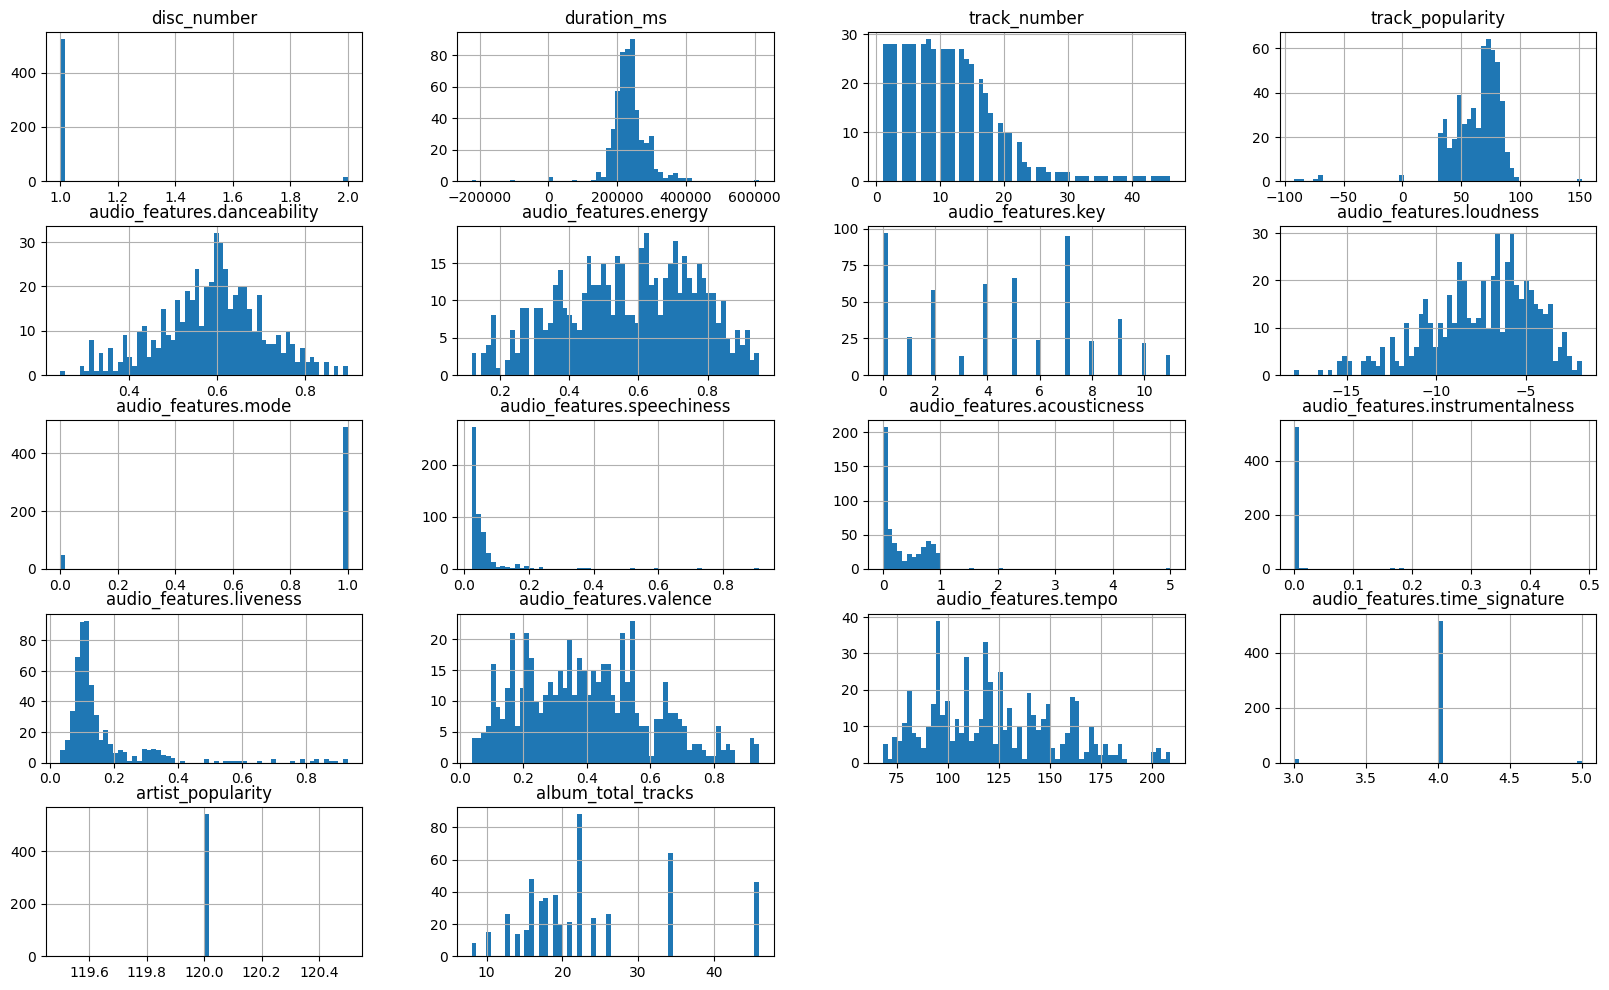

In [63]:
df.hist(bins=60, figsize =( 20 , 12))

Se observa, por ejemplo, que en el campo 'duration_ms' existen outleirs.

Ahora, se grafica un ejemplo de esto, se observan los tracks con 'duration_ms' mayor a 400000:


In [64]:
outliers = df[df['duration_ms']>400000]

<Axes: xlabel='track_id', ylabel='duration_ms'>

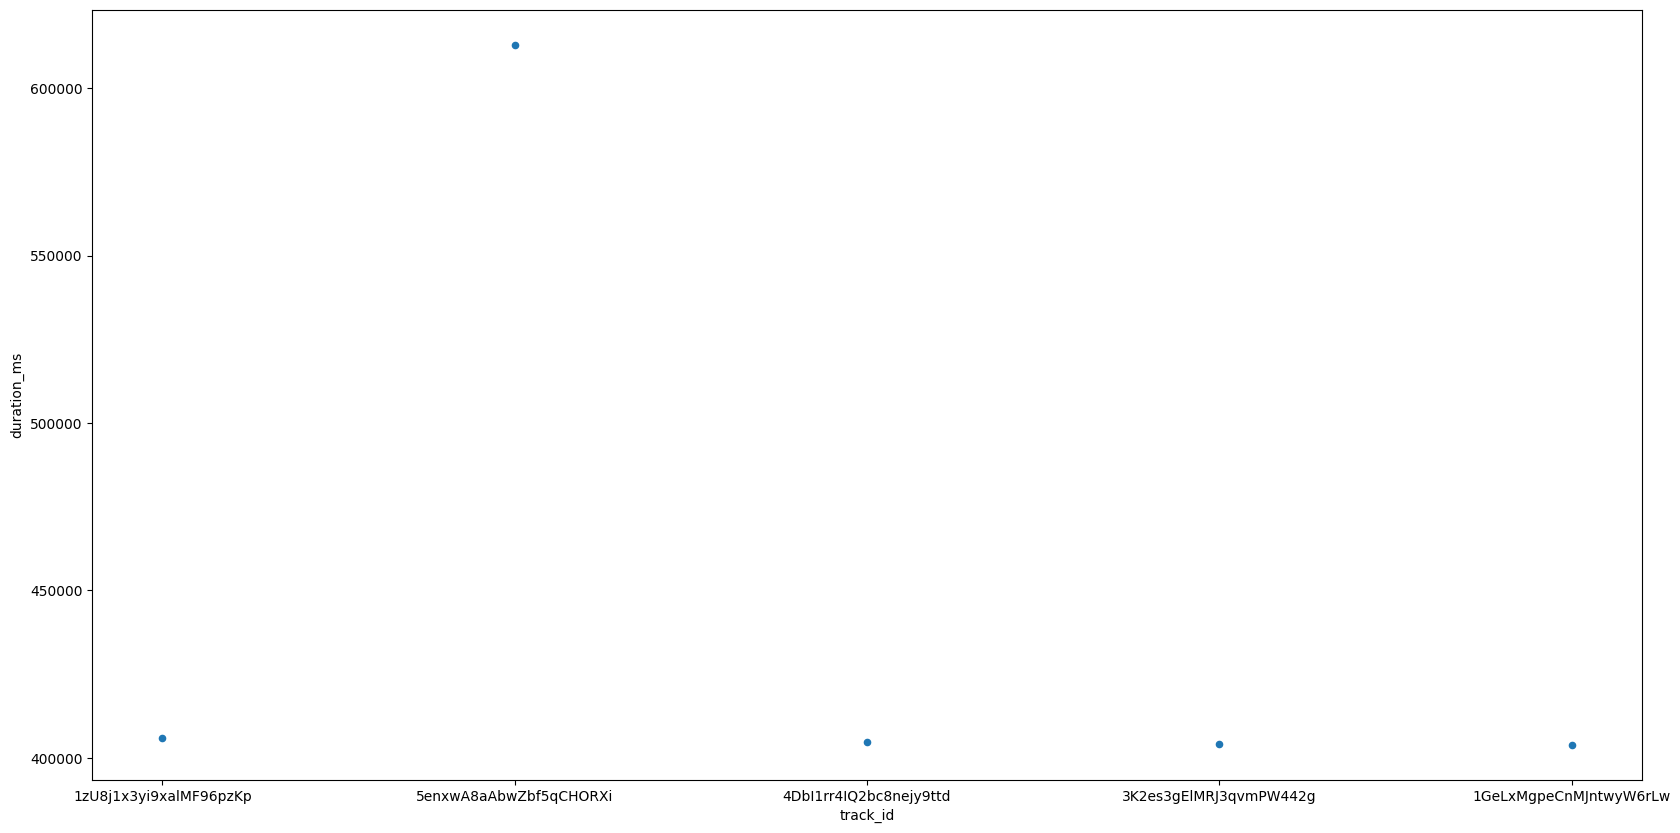

In [65]:
outliers[['track_id', 'duration_ms']].plot(kind='scatter', x = 'track_id', y = 'duration_ms', figsize = (20,10) )


Se debe tratar esto en los campos que se requiera, como lo puede ser duration_ms, algunas de las características de las canciones:'danceability', 'loudness', 'speechiness', entre otros. Luego, tener en cuenta que no se debe aplicar en todos los campos numéricos, por ejemplo, aplicarlo en un campo como 'dics_number' no sería adecuado.

Se recomienda usar la siguiente estrategia:


El procedimiento para manejar los outliers es el siguiente:

1.   Se calculan los cuartiles para cada variable
2.   Se calcula el rango intercuartil(IQR) de la siguiente forma Q3-Q1, tener en cuenta que el IQR es una medida de la dispersión de los datos
3.  Se calcula el límite superior para los valores atípicos. Se obtiene sumando 1.5 veces el IQR al tercer cuartil. Los valores superiores a este límite se considerarán valores atípicos.
4. Se calcula el límite inferior para los valores atípicos. Se obtiene restando 1.5 veces el IQR al primer cuartil. Los valores inferiores a este límite se considerarán valores atípicos
5. Se ajustan los valores que están por debajo del límite inferior de manera que sean iguales al valor mínimo de los valores que están dentro del rango aceptable
6. se ajustan los valores que están por encima del límite superior de manera que sean iguales al valor máximo de los valores que están dentro del rango aceptable

Recordar que todo esto se basa en los Cuartiles, medida que me permite conocer el posicionamiento de los datos y su dispersión:

In [66]:
#def handle_outliers(df):

    #stats = df.describe()
    #Q1 = stats.loc['25%']
    #Q3 = stats.loc['75%']
    #IQR = Q3 - Q1
    #max_contiction = Q3 + (1.5 * IQR)
    #min_contiction = Q1 - (1.5 * IQR)

    #for i, column in enumerate(df.columns):
        #df.loc[df[column] < min_contiction[i], column] = df.loc[df[column] >= min_contiction[i], column].min()
        #df.loc[df[column] > max_contiction[i], column] = df.loc[df[column] <= max_contiction[i], column].max()

    #return df

##verificar fechas

Se quiere verificar que la colomna con fecha se encuentre en un formato adecuado en todas sus filas:

In [67]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df[df['album_release_date'].isnull()]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks


No existe ningún error en este campo


Muchas gracias por la atencion!

##Referencias:


[1]  [THE SIX PRIMARY DIMENSIONS FOR DATA QUALITY ASSESSMENT](https://www.sbctc.edu/resources/documents/colleges-staff/commissions-councils/dgc/data-quality-deminsions.pdf)